In [2]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 9.2 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 10.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 10.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 8.6 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 7.7 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 6.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.3 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.3 MB 2.0 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 2.0 MB/s eta 0:00:01
   --------------------------- 


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install numpy matplotlib scikit-learn tensorflow


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 7.9 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.7 MB 7.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/8.7 MB 7.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.7 MB 6.0 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 5.6 MB/s eta 0:00:01
   --------------------------- ------------ 6.0/8.7 MB 5.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.6/8.7 MB 4.9 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 4.6 MB/s eta 0:00:01
   ------------------------------------ --- 7.9/8.7 MB 4.3 MB/s eta 0:00:01
   -------------------------------------- - 8.4/8.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import models, layers, optimizers, datasets

In [5]:
# Step 2: Load the MNIST dataset
print("Loading MNIST dataset...")
(trainX, trainY), (testX, testY) = datasets.mnist.load_data()

Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


In [6]:
# Step 3: Flatten the dataset (convert 28x28 images to 784-dim vectors)
trainX = trainX.reshape((trainX.shape[0], 28 * 28))
testX = testX.reshape((testX.shape[0], 28 * 28))

In [7]:
# Step 4: Normalize pixel values (0–255 -> 0–1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [8]:
# Step 5: Convert labels to one-hot encoding
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [9]:
# Step 6: Define the Feedforward Neural Network (Sequential model)
model = models.Sequential([
    layers.Dense(256, activation="sigmoid", input_shape=(784,)),
    layers.Dense(128, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

C:\Users\risha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 7: Compile the model
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [11]:
# Step 8: Train the model
print("Training the model...")
history = model.fit(trainX, trainY, validation_data=(testX, testY),
                    epochs=10, batch_size=128, verbose=1)


Training the model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1868 - loss: 2.2865 - val_accuracy: 0.1686 - val_loss: 2.2474
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3723 - loss: 2.2153 - val_accuracy: 0.5586 - val_loss: 2.1748
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5185 - loss: 2.1322 - val_accuracy: 0.5922 - val_loss: 2.0752
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5915 - loss: 2.0127 - val_accuracy: 0.6138 - val_loss: 1.9295
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6344 - loss: 1.8431 - val_accuracy: 0.6913 - val_loss: 1.7309
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6812 - loss: 1.6313 - val_accuracy: 0.6884 - val_loss: 1.5060
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7164 - loss: 1.4123 - val_accuracy: 0.7367 - val_loss: 1.2964
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7496 - loss: 1.2

In [12]:
# Step 9: Evaluate the model
print("Evaluating the model...")
loss, accuracy = model.evaluate(testX, testY, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Evaluating the model...
Test Loss: 0.8850
Test Accuracy: 80.65%


In [13]:
# Step 10: Classification report
predictions = model.predict(testX)
print("\nClassification Report:")
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       980
           1       0.81      0.98      0.89      1135
           2       0.88      0.76      0.82      1032
           3       0.73      0.85      0.78      1010
           4       0.72      0.85      0.78       982
           5       0.86      0.53      0.66       892
           6       0.87      0.89      0.88       958
           7       0.82      0.88      0.85      1028
           8       0.80      0.68      0.74       974
           9       0.77      0.64      0.70      1009

    accuracy                           0.81     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.81      0.80     10000



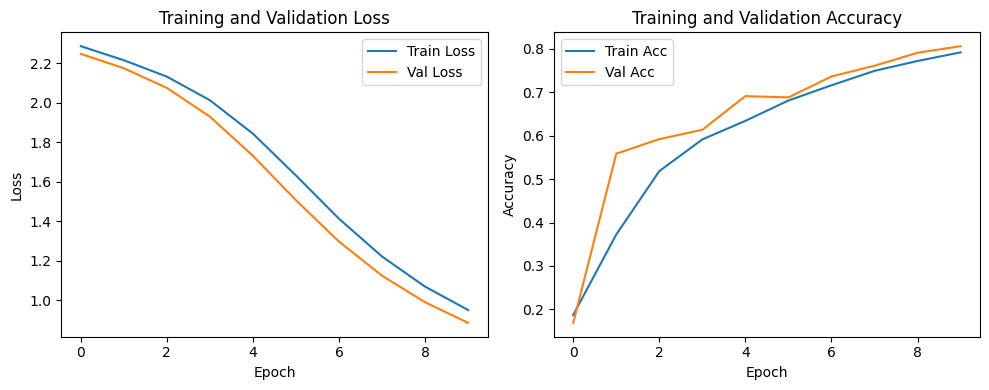

In [14]:
# Step 11: Plot training loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()